In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import flg_yolo
import flg_diagnostics
import pandas as pd

fast_mode = False
if fls.is_submission:
    fast_mode = False

MainProcess


In [2]:
# Prepare datasets
#fls.download_kaggle_dataset('jeroencottaar/byu-many-models/', fls.result_dir + '/many_full_res/')

In [3]:
data = fls.dill_load(fls.result_dir + '/many_full_res/Baseline_0M_c36e9856_524 _f.pickle')
print(fls.score_competition_metric(data.inferred_test_data, data.test_data))
data.trained_model.data_after_step2 = data.inferred_test_data
#for d in data.inferred_test_data:
#    data.trained_model.data_after_step2.append(d)

(0.8827160493827161, 0.4766666666666667, 0.5249632892804699)


In [4]:
ref_data = data.test_data
data.trained_model.step3Output.threshold = -1.
inferred_data = data.trained_model.infer(data.test_data)
print(fls.score_competition_metric(inferred_data, data.test_data))

0
350
(0.8136882129277566, 0.7133333333333334, 0.7313738892686261)


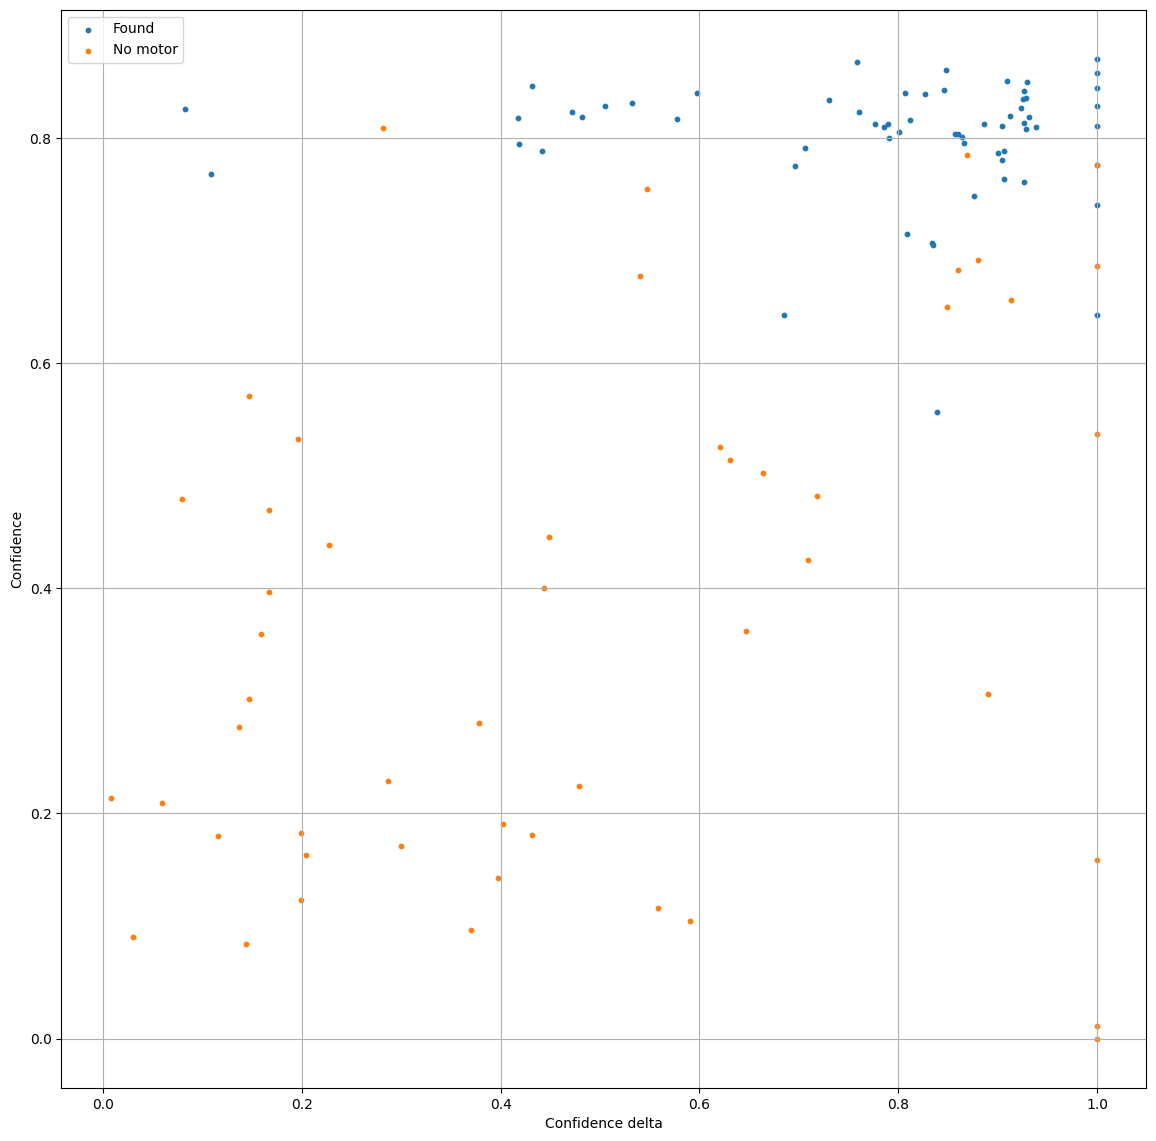

In [5]:
res = []
inferred_data_check = copy.deepcopy(inferred_data)
for d in inferred_data_check:
    d.labels_unfiltered = d.labels.reset_index()
    if len(d.labels_unfiltered)==0:
        assert(len(d.labels)==0)
        di = {'z':0, 'y':0, 'x':0, 'confidence':0}
        d.labels_unfiltered = pd.DataFrame([di])
fls.mark_tf_pn(inferred_data_check, data.test_data)
res_list = []
for c,d,t in zip(inferred_data_check, inferred_data, data.test_data):
    res = dict()
    res['confidence'] = c.labels_unfiltered.at[0,'confidence']
    if len(d.labels_unfiltered)>1:
        vals = np.sort(d.labels_unfiltered['confidence'])
        assert vals[-1] == res['confidence']
        res['confidence_delta'] = (vals[-1]-vals[-2])/vals[-1]
    else:
        res['confidence_delta'] = 1#res['confidence']
    if c.labels_unfiltered.at[0,'tf_pn']==0:
        res['category'] = 'found'         
    elif len(t.labels)>0:
        res['category'] = 'misplaced'
    else:
        res['category'] = 'no motor'
    if c.name[:3]=='tom':
        res_list.append(res)
result = pd.DataFrame(res_list)

plt.figure(figsize=(14,14))
plt.grid(True)
plt.xlabel('Confidence delta')
plt.ylabel('Confidence')
to_plot = (result['category']=='found')
plt.scatter(result['confidence_delta'][to_plot], result['confidence'][to_plot], s=10)
to_plot = (result['category']=='no motor')
plt.scatter(result['confidence_delta'][to_plot], result['confidence'][to_plot], s=10)
#to_plot = (result['category']=='misplaced')
#plt.scatter(result['confidence_delta'][to_plot], result['confidence'][to_plot], s=10)
plt.legend(['Found', 'No motor'])
plt.legend(['Found', 'No motor', 'Misplaced'])

In [12]:
%debug

> c:\users\jeroe\appdata\local\temp\ipykernel_13864\2995845903.py(15)<module>()



ipdb>  print(c.labels_unfiltered)


   z  y  x  confidence  tf_pn
0  0  0  0           0    1.0


ipdb>  print(d.labels_unfiltered)


      z    y    x  confidence
0   589  350  472    0.532959
1   597  438  294    0.428528
2   594  363  718    0.196683
3   533  740  480    0.140376
4   287    2  450    0.080864
5   623  745  908    0.077446
6   612  627  437    0.123256
7   764  125  111    0.072808
8   629   97   97    0.071343
9   530  730  278    0.067162
10  470  497  716    0.053246
11  284  139  364    0.085444
12  749  421  920    0.049156
13   22  699  447    0.047570


ipdb>  q


True positives: 223 out of 300
False negatives - seen but not selected: 26 out of 300
False negatives - not seen: 51 out of 300
False positives: 49 out of 50


d:\flagellar/code/core\flg_numerics.py:83: RuntimeWarning: Mean of empty slice
  mean_list = np.nanmean(to_append, axis=(1,2))#extract_patch(d.mean_per_slice, coords[:1], sizes[:1], constant_value=np.nan)
C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


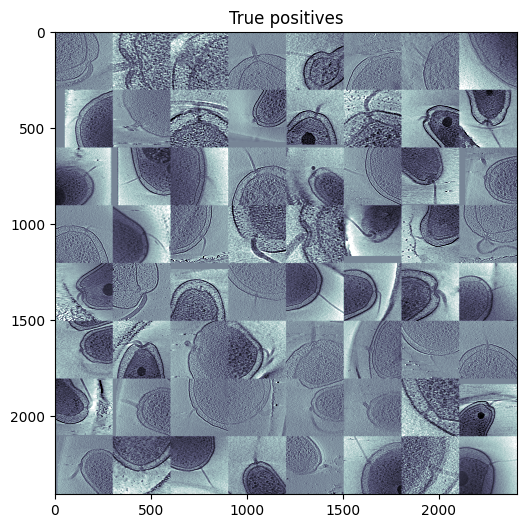

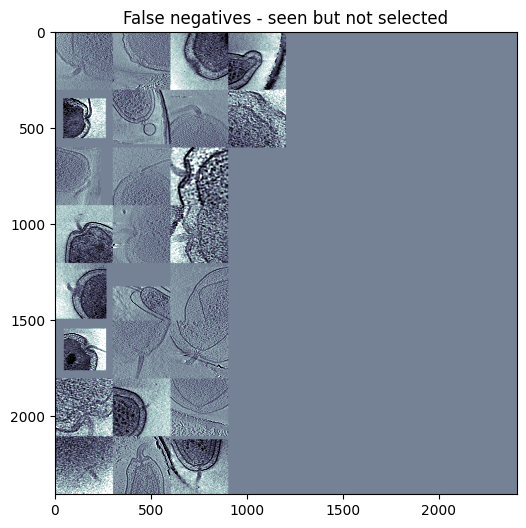

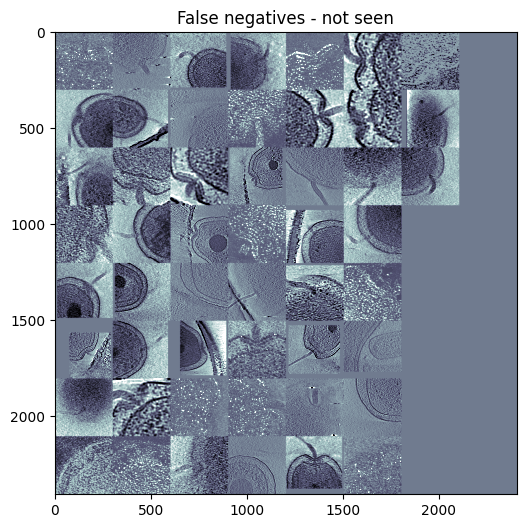

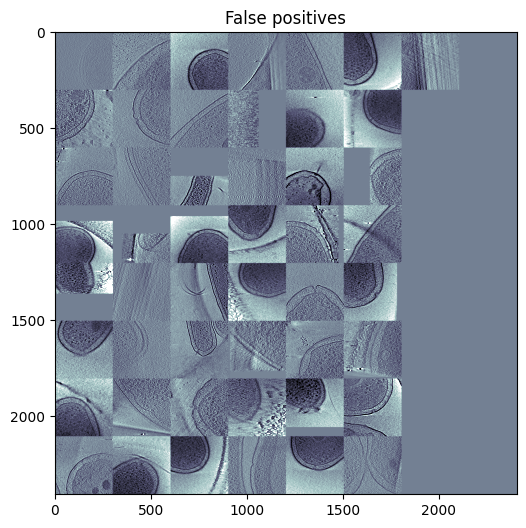

In [ ]:
importlib.reload(flg_diagnostics)
flg_diagnostics.show_tf_pn(inferred_data, ref_data)